# Lezione 4

## Dario Pullia

Ci proponiamo di simulare la dinamica molecolare di un sistema microcanonico NVE.

#### Fisica
Scegliamo di implementare **l'algoritmo di Verlet**, che di fatto è una espansione in serie di Taylor al terz'ordine. $$\vec r(t+dt)=2\vec r(t)-\vec r(t-dt)+\vec a(t)dt^2$$

Ogni coppia di particelle risente di un potenziale di **Lennard-Jones** $$V = 4\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] $$
Dal cui gradiente si ricava la forza e quindi l'accelerazione.

Sapendo la posizione e la velocità di ogni particella nel sistema, possiamo calcolare le propietà termodinamiche di questo. Implementiamo il calcolo di:
- Energia totale $E=K+U$
- Energia cinetica  $K_{tot}=\sum_{i=0}^N \frac{1}{2}m(v_x^2+v_y^2+v_z^2)_i$
- Energia potenziale $U_{tot}=\sum_{i=0}^N U_i$ dove ogni energia potenziale è nella forma di LJ
- Temperatura $T = 2K_{tot}/(3N)$
- Pressione $$P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[\left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - \frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle$$ ottenuta con il teorema del viriale

#### Tecniche computazionali

In condizioni standard (0 Celsius e 1 ATM), un litro di aria contiene circa $\frac{1}{22} moli=\frac{6,02214076×10^{23}}{22} particelle$. Pensare di calcolare la dinamica di ognuna di queste particelle è semplicemente irrealistico. 

Introduciamo il concetto di **raggio di cut-off** e di **Periodic Boundary Conditions**

Le Periodic Boundary Conditions o **PCB** (*effetto pacman* per i terrapiattisti) sono utili per simulare la presenza di un numero infinito di particelle calcolandone un numero finito e ridotto. 
Di fatto significa immaginare un mondo periodico in tutte le direzioni, per cui è sufficiente calcolare un volume cubico di raggio R con N particelle. Se la dinamica porta una particella fuori dal volume, questa rientrerà dal lato opposto con uguale velocità. 

Il raggio di cut-off è un raggio arbitrario che rappresenta la sfera di influenza di ogni particella. Il potenziale di LJ ha range infinito, pertanto teoricamente ognuna delle infinite (PCB!) particelle influisce sul comportamento di tutte le altre. Il cut-off è un troncamento del potenziale che rende il calcolo realizzabile ma introduce la necessità di una correzione (Lezione 7). Cut-off alti riducono l'imprecisione aumentando la complessità del calcolo. 


#### Equilibrazione

Ogni simulazione inizia in una configurazione cristallina perfetta. 
Serve dare del tempo al sistema di evolversi autonomamente prima di poterlo considerare in equilibrio ed estrarne delle misure, questa procedura si chiama **equilibrazione**. 

Inoltre, notiamo che la temperatura input non si manifesta poi nella temperatura misurata, perchè la ripartizione dell'energia è lasciata alla simulazione. Per ottenere la temperatura misurata si è quindi lavorato modificando il parametro di input affinchè la misura corrispondesse alla richiesta del problema.


I parametri scelti per la simulazione, in unità di LJ, sono:
1. solido: $\rho^\star = 1.1$, $T^\star_{Input} = 1.55$ ($T^\star_{Target} = 0.8$) (cut-off radius: $r_c = 2.2$)
2. liquido: $\rho^\star = 0.8$, $T^\star_{Input} = 2.0$ ($T^\star_{Target} = 1.1$) (cut-off radius: $r_c = 2.5$)
3. gas: $\rho^\star = 0.05$, $T^\star_{Input} = 0.97$ ($T^\star_{Target} = 1.2$) (cut-off radius: $r_c = 5.0$)


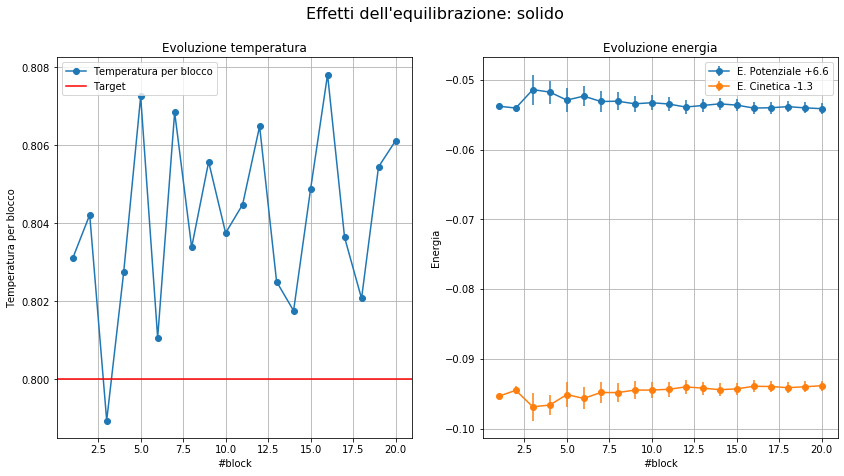

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

npart=108
N=20

TempInsta= np.loadtxt("dataeq/solid/output_temp.dat", usecols=(1), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("dataeq/solid/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("dataeq/solid/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
x = np.arange(N)+1 

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14, 7))
fig.suptitle("Effetti dell'equilibrazione: solido", fontsize=16)
ax1.plot(x,TempInsta, marker="o", label="Temperatura per blocco")
ax1.set_xlabel('#block')
ax1.set_title('Evoluzione temperatura')
ax1.set_ylabel('Temperatura per blocco')
ax1.axhline(y = 0.8, color = 'r', linestyle = '-',label="Target")
ax1.grid(True)
ax1.legend()

ax2.errorbar(x,Epot+6.6, yerr=EpotErr, marker="o", label="E. Potenziale +6.6")
ax2.errorbar(x,Ekin-1.3, yerr=EkinErr, marker="o", label="E. Cinetica -1.3")
ax2.set_title('Evoluzione energia')
ax2.set_xlabel('#block')
ax2.set_ylabel('Energia')
ax2.grid(True)
ax2.legend()


plt.show()


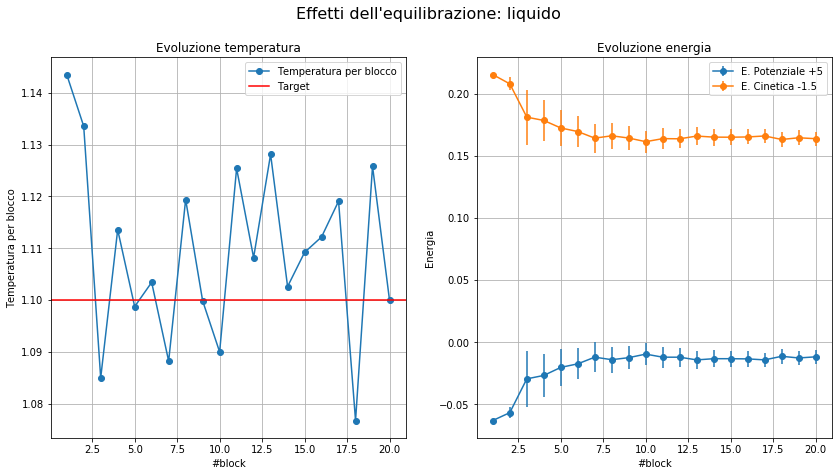

In [33]:
TempInsta= np.loadtxt("dataeq/liquid/output_temp.dat", usecols=(1), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("dataeq/liquid/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("dataeq/liquid/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
x = np.arange(N)+1 

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14, 7))
fig.suptitle("Effetti dell'equilibrazione: liquido", fontsize=16)
ax1.plot(x,TempInsta, marker="o", label="Temperatura per blocco")
ax1.set_xlabel('#block')
ax1.set_title('Evoluzione temperatura')
ax1.set_ylabel('Temperatura per blocco')
ax1.axhline(y = 1.1, color = 'r', linestyle = '-',label="Target")
ax1.grid(True)
ax1.legend()

ax2.errorbar(x,Epot+5, yerr=EpotErr, marker="o", label="E. Potenziale +5")
ax2.errorbar(x,Ekin-1.5, yerr=EkinErr, marker="o", label="E. Cinetica -1.5")
ax2.set_title('Evoluzione energia')
ax2.set_xlabel('#block')
ax2.set_ylabel('Energia')
ax2.grid(True)
ax2.legend()


plt.show()


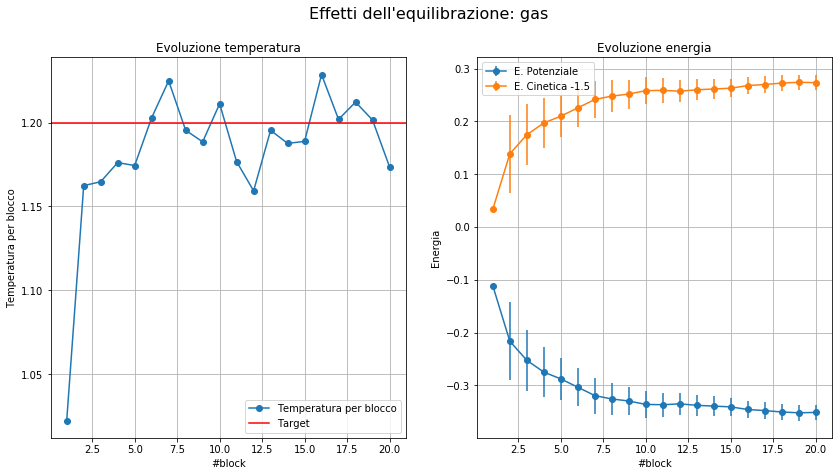

In [48]:
TempInsta= np.loadtxt("dataeq/gas/output_temp.dat", usecols=(1), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("dataeq/gas/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("dataeq/gas/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
x = np.arange(N)+1 

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14, 7))
fig.suptitle("Effetti dell'equilibrazione: gas", fontsize=16)
ax1.plot(x,TempInsta, marker="o", label="Temperatura per blocco")
ax1.set_xlabel('#block')
ax1.set_title('Evoluzione temperatura')
ax1.set_ylabel('Temperatura per blocco')
ax1.axhline(y = 1.2, color = 'r', linestyle = '-',label="Target")
ax1.grid(True)
ax1.legend()

ax2.errorbar(x,Epot, yerr=EpotErr, marker="o", label="E. Potenziale")
ax2.errorbar(x,Ekin-1.5, yerr=EkinErr, marker="o", label="E. Cinetica -1.5")
ax2.set_title('Evoluzione energia')
ax2.set_xlabel('#block')
ax2.set_ylabel('Energia')
ax2.grid(True)
ax2.legend()


plt.show()


Per apprezzare la variazione delle energie, nei grafici precedenti è stata fatta una traslazione verticale. Notiamo che l'energia totale viene conservata sempre.

D'ora in poi il programma inizierà dalla configurazione finale ottenuta.

### Esercizio 04.2

Ogni simulazione è composta da 20 blocchi da 2000 passi.

#### Solido

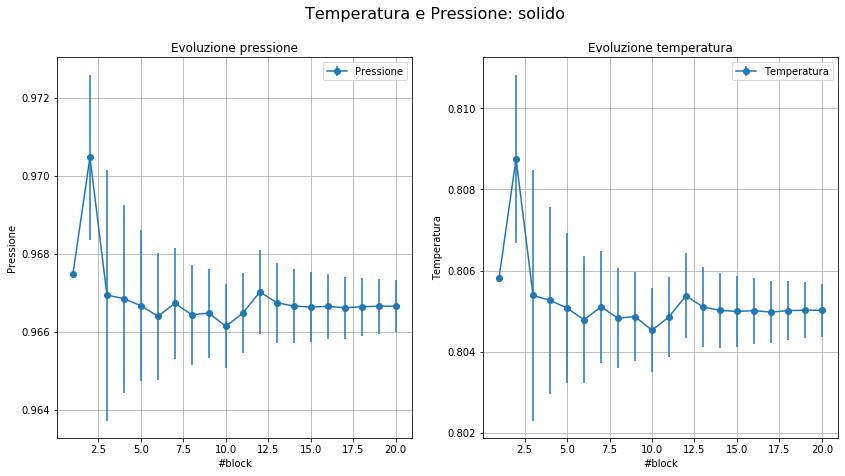

In [75]:
pres, presErr= np.loadtxt("data02/solid/output_pres.dat", usecols=(2,3), delimiter=' ', unpack='true')
Etot, EtotErr= np.loadtxt("data02/solid/output_etot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("data02/solid/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("data02/solid/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
Temp, TempErr= np.loadtxt("data02/solid/output_temp.dat", usecols=(2,3), delimiter=' ', unpack='true')

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14, 7))

fig.suptitle("Temperatura e Pressione: solido", fontsize=16)
ax1.errorbar(x,pres, yerr=presErr, marker="o", label="Pressione")
ax1.set_xlabel('#block')
ax1.set_title('Evoluzione pressione')
ax1.set_ylabel('Pressione')
ax1.grid(True)
ax1.legend()

ax2.errorbar(x,Temp, yerr=TempErr, marker="o", label="Temperatura")
ax2.set_title('Evoluzione temperatura')
ax2.set_xlabel('#block')
ax2.set_ylabel('Temperatura')
ax2.grid(True)
ax2.legend()




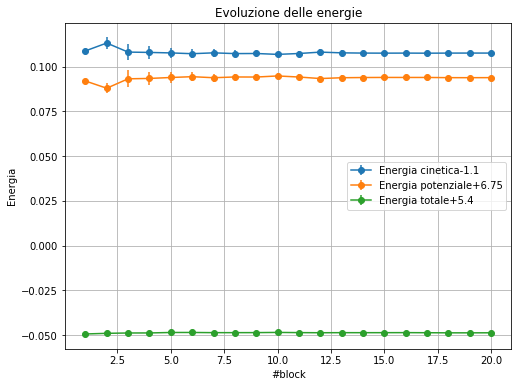

In [76]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,Ekin-1.1, yerr=EkinErr, marker="o", label="Energia cinetica-1.1")
plt.errorbar(x,Epot+6.75, yerr=EpotErr, marker="o", label="Energia potenziale+6.75")
plt.errorbar(x,Etot+5.4, yerr=EtotErr, marker="o", label="Energia totale+5.4")
plt.title('Evoluzione delle energie')
plt.xlabel('#block')
plt.ylabel('Energia')
plt.grid(True)
plt.legend()
plt.show()


#### Liquido

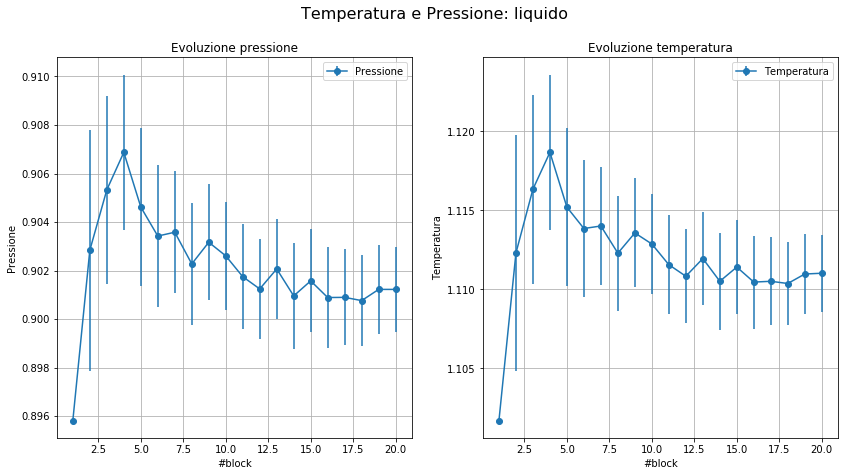

In [77]:
pres, presErr= np.loadtxt("data02/liquid/output_pres.dat", usecols=(2,3), delimiter=' ', unpack='true')
Etot, EtotErr= np.loadtxt("data02/liquid/output_etot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("data02/liquid/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("data02/liquid/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
Temp, TempErr= np.loadtxt("data02/liquid/output_temp.dat", usecols=(2,3), delimiter=' ', unpack='true')

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14, 7))

fig.suptitle("Temperatura e Pressione: liquido", fontsize=16)
ax1.errorbar(x,pres, yerr=presErr, marker="o", label="Pressione")
ax1.set_xlabel('#block')
ax1.set_title('Evoluzione pressione')
ax1.set_ylabel('Pressione')
ax1.grid(True)
ax1.legend()

ax2.errorbar(x,Temp, yerr=TempErr, marker="o", label="Temperatura")
ax2.set_title('Evoluzione temperatura')
ax2.set_xlabel('#block')
ax2.set_ylabel('Temperatura')
ax2.grid(True)
ax2.legend()




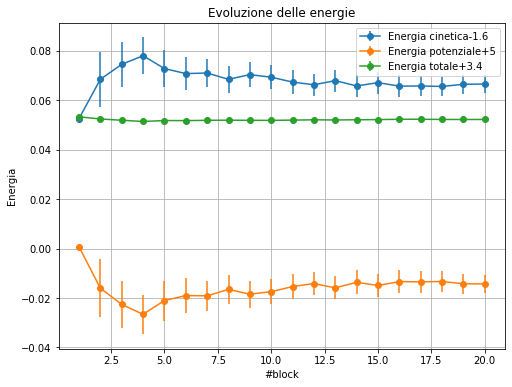

In [78]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,Ekin-1.6, yerr=EkinErr, marker="o", label="Energia cinetica-1.6")
plt.errorbar(x,Epot+5, yerr=EpotErr, marker="o", label="Energia potenziale+5")
plt.errorbar(x,Etot+3.4, yerr=EtotErr, marker="o", label="Energia totale+3.4")
plt.title('Evoluzione delle energie')
plt.xlabel('#block')
plt.ylabel('Energia')
plt.grid(True)
plt.legend()
plt.show()


#### Gas

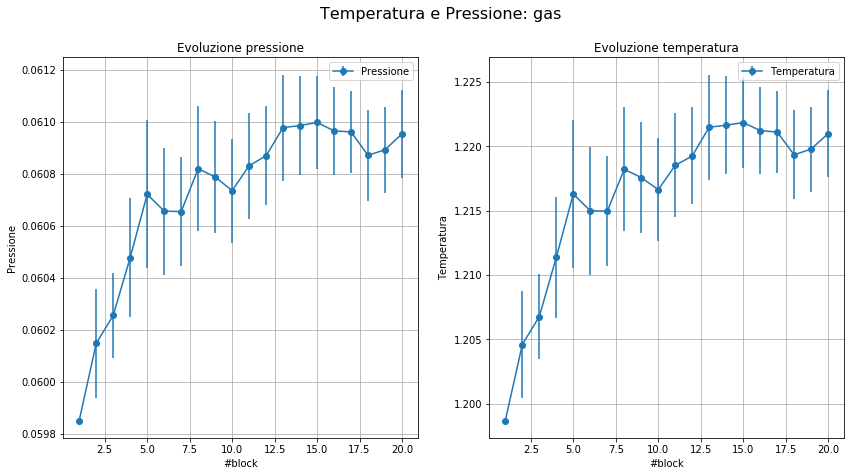

In [79]:
pres, presErr= np.loadtxt("data02/gas/output_pres.dat", usecols=(2,3), delimiter=' ', unpack='true')
Etot, EtotErr= np.loadtxt("data02/gas/output_etot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("data02/gas/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("data02/gas/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
Temp, TempErr= np.loadtxt("data02/gas/output_temp.dat", usecols=(2,3), delimiter=' ', unpack='true')

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14, 7))

fig.suptitle("Temperatura e Pressione: gas", fontsize=16)
ax1.errorbar(x,pres, yerr=presErr, marker="o", label="Pressione")
ax1.set_xlabel('#block')
ax1.set_title('Evoluzione pressione')
ax1.set_ylabel('Pressione')
ax1.grid(True)
ax1.legend()

ax2.errorbar(x,Temp, yerr=TempErr, marker="o", label="Temperatura")
ax2.set_title('Evoluzione temperatura')
ax2.set_xlabel('#block')
ax2.set_ylabel('Temperatura')
ax2.grid(True)
ax2.legend()




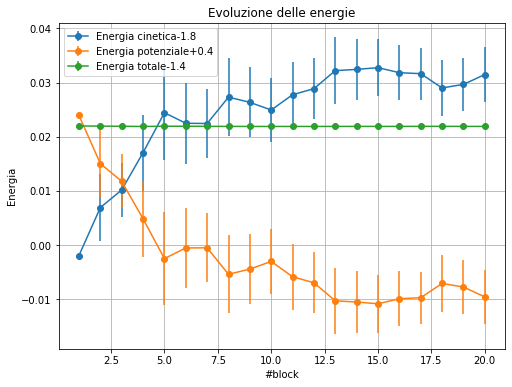

In [83]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,Ekin-1.8, yerr=EkinErr, marker="o", label="Energia cinetica-1.8")
plt.errorbar(x,Epot+0.4, yerr=EpotErr, marker="o", label="Energia potenziale+0.4")
plt.errorbar(x,Etot-1.4, yerr=EtotErr, marker="o", label="Energia totale-1.4")
plt.title('Evoluzione delle energie')
plt.xlabel('#block')
plt.ylabel('Energia')
plt.grid(True)
plt.legend()
plt.show()


In tutti i casi, l'energia totale si conserva correttamente. La temperatura e la pressione vanno di pari passo come previsto perchè entrambi sono diretta conseguenza dell'energia cinetica.